## Description
This notebook generates the data for the shortest problem. We generate two versions of the same data: one where graphs are vertex-weighted and one where graphs are edge-weighted. The data consists of:
  - pairs (d,x) where d is a five dim contextual vector and x encodes the shortest path. In the **v**ertex version of the data set, the path is represented via a binary $m\times m$ matrix with ones indicating the vertices traversed by the path. In the **e**dge version, the data set is represented via a binary $|E|$ vector, where $|E|$ is the number of edges. 
  - W, a d-by-m^2 matrix which maps contexts to vertex weights.
  - A, the vertex-edge adjacency matrix. b a vector
  - Some useful metadata, e.g. the number of edges, and an edge list.

In [4]:
import torch
import time

import sys
root_dir = "../../"
sys.path.append(root_dir)

from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from src.utils import edge_to_node, create_shortest_path_data




In [5]:
## Fix some parameters
train_size = 200
test_size = 200
context_size = 5
# m_max = 25 # generate m-by-m graphs, with m in increments of 5, between 5 and m_max inclusive. 

In [6]:
# Loop over graph sizes
# grid_array = [5,10,15,20,25,50,100]
# for m in grid_array:
m = 30
start_time = time.time()
print('Start building dataset for m = ' + str(m))
train_dataset_v, test_dataset_v, train_dataset_e, test_dataset_e, WW, A, b, num_edges, Edge_list = create_shortest_path_data(m, train_size, test_size, context_size)
end_time = time.time()
print('Created data! Now saving')
state = {
      'WW': WW,
      'train_dataset_v': train_dataset_v,
      'test_dataset_v': test_dataset_v,
      'train_dataset_e': train_dataset_e,
      'test_dataset_e': test_dataset_e,
      'm': m,
      'A':A,
      'b':b,
      'num_edges': num_edges,
      'Edge_list': Edge_list,
      }
save_dir = './shortest_path_data/' ############# CHANGE THIS BACK TO shortest_path_data
state_path = save_dir + 'Shortest_Path_training_data' + str(m) +'.pth'
torch.save(state, state_path)
print('Finished building dataset for m = ' + str(m), ', Time = ', end_time - start_time, ' seconds')

Start building dataset for m = 30
Created data! Now saving
Finished building dataset for m = 30 , Time =  18.93810510635376  seconds


## Examine some paths
The next two blocks are test code to see if the new data generating functions are working.

In [7]:
## Examine some paths
state = torch.load('./shortest_path_data/Shortest_Path_training_data30.pth')

## Extract data from state
train_dataset_e = state['train_dataset_e']
test_dataset_e = state['test_dataset_e']
train_dataset_v = state['train_dataset_v']
test_dataset_v = state['test_dataset_v']
m = state["m"]
A = state["A"].float()
b = state["b"].float()
num_edges = state["num_edges"]
Edge_list = state["Edge_list"]
Edge_list_torch = torch.tensor(Edge_list)

## Visualization
The next block of code visually verifies that the data in **v**ertex format and **e**dge format are the same. For any choise of `i`, the two paths illustrated should be the same.

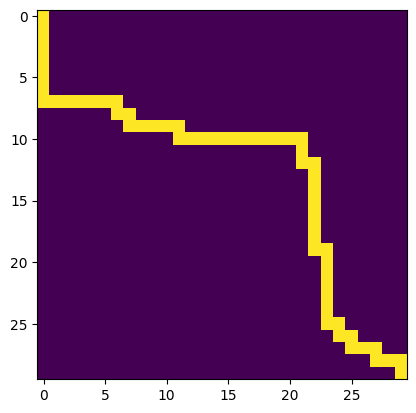

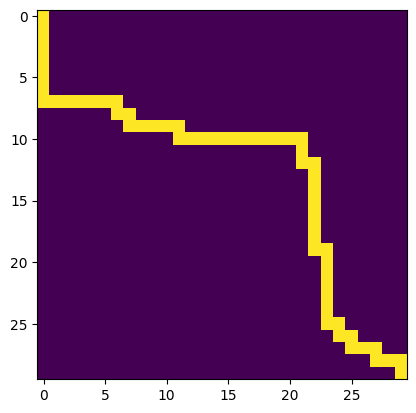

In [10]:
train_loader_e = DataLoader(dataset=train_dataset_e, batch_size=200,
                                  shuffle=False)
d_batch_e, path_batch_e = next(iter(train_loader_e))

train_loader_v = DataLoader(dataset=train_dataset_v, batch_size=200,
                                  shuffle=False)
d_batch_v, path_batch_v = next(iter(train_loader_v))

# Choose a sample
i = 47

plt.imshow(path_batch_v[i,:,:])
plt.show()
plt.imshow(edge_to_node(path_batch_e[i,:], Edge_list, m, 'cpu'))
plt.show()